In [1]:
import pandas as pd
import requests
from IPython.display import Image
import time
from ftplib import FTP

from PIL import Image
from PIL import ImageFile
import rawpy
import imageio
ImageFile.LOAD_TRUNCATED_IMAGES = True


import os, shutil

import os
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
imagecount = 53

In [3]:
typdict = {'NDC':'str'}
df = pd.read_csv('../data/directory_of_images.txt',sep='|', dtype=typdict, names=['NDC','IDK','FILE','TYPE','DRUG'])
df = df.dropna()
df.DRUG = df.DRUG.str.upper()
df[['ORIG_FOLDER','IMAGES','FILENAME']] = df.FILE.str.split('/', expand=True)
df['FILETYPE'] = df.FILENAME.str[-4:]
df = df[df.FILETYPE != '.WMV']

In [4]:
ndcs = df.NDC.value_counts()
n = ndcs[ndcs == imagecount].index
# #n100 = ndcs[ndcs <= 100].index
# ndcs50100 = list(set(n50) & set(n100))
dfn = df[df.NDC.isin(n)]
dfn

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
33071,00143125401,1,PillProjectDisc42/images/BOTW_U-7B38QI608WBLMK...,C3PI_Reference,HYDROCORTISONE 20MG TAB,PillProjectDisc42,images,BOTW_U-7B38QI608WBLMK3P52!ZG1Q7.CR2,.CR2
33072,00143125401,1,PillProjectDisc68/images/CKO94Z7AV76QYOF91MRDK...,C3PI_Reference,HYDROCORTISONE 20MG TAB,PillProjectDisc68,images,CKO94Z7AV76QYOF91MRDK5D-JWZV3VE.CR2,.CR2
33073,00143125401,1,PillProjectDisc101/images/S9SVRFMHZFEZK8KAWDP!...,C3PI_Test,HYDROCORTISONE 20MG TAB,PillProjectDisc101,images,S9SVRFMHZFEZK8KAWDP!K00_RMO_MM.JPG,.JPG
33074,00143125401,1,PillProjectDisc108/images/YT4UYUYOUGXG7_UMHOBH...,C3PI_Test,HYDROCORTISONE 20MG TAB,PillProjectDisc108,images,YT4UYUYOUGXG7_UMHOBHOLE8WYLV-3.JPG,.JPG
33075,00143125401,1,PillProjectDisc10/images/6OO_M68F8T!9V95LURU0M...,C3PI_Test,HYDROCORTISONE 20MG TAB,PillProjectDisc10,images,6OO_M68F8T!9V95LURU0M8ZM6XC7S!.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
132023,68462030205,1,PillProjectDisc65/images/CHCFH7-YUCRX6GLTU-R7K...,MC_CHALLENGE_V1.0,INDOMETHACIN 50MG CAP,PillProjectDisc65,images,CHCFH7-YUCRX6GLTU-R7KG!DLAQKL68.JPG,.JPG
132024,68462030205,1,PillProjectDisc15/images/B-ZMWMCD04BURC9MAF5ID...,MC_COOKED_CALIBRATED_V1.2,INDOMETHACIN 50MG CAP,PillProjectDisc15,images,B-ZMWMCD04BURC9MAF5IDFABCLE331P.PNG,.PNG
132025,68462030205,1,PillProjectDisc19/images/B3BEJHYTKCTWERBMS07JN...,MC_COOKED_CALIBRATED_V1.2,INDOMETHACIN 50MG CAP,PillProjectDisc19,images,B3BEJHYTKCTWERBMS07JN8_U_N_KQ_V.PNG,.PNG
132026,68462030205,1,PillProjectDisc44/images/BQIYJ3!LDOK9RAUL8936S...,MC_COOKED_CALIBRATED_V1.2,INDOMETHACIN 50MG CAP,PillProjectDisc44,images,BQIYJ3!LDOK9RAUL8936S8O9579SLM5.PNG,.PNG


In [5]:
dfn.DRUG.value_counts()

GABAPENTIN 600MG TABLETS         53
INDAPAMIDE 2.5 MG                53
IBUPROFEN 400MG TABS             53
HYDROCORTISONE 20MG TAB          53
HALOPERIDOL 10MG TAB             53
HALOPERIDOL 2MG TAB              53
LEVOTHYROXINE 50MCG TAB          53
AVODART SOFT GELATIN CAPSULES    53
LANOXIN TABLETS, USP             53
INDOMETHACIN 50MG CAP            53
Name: DRUG, dtype: int64

In [6]:
drugs = dfn.NDC.value_counts()
drugslist = drugs.index.tolist()
len(dfn.NDC.value_counts()),drugs

(10,
 00173024955    53
 00781139301    53
 00527134210    53
 00143125401    53
 68462030205    53
 53746046405    53
 00173071202    53
 68462012605    53
 68382008001    53
 00378008001    53
 Name: NDC, dtype: int64)

In [7]:
df_a = dfn.groupby(['DRUG','NDC']).count()
df_a.reset_index(inplace=True)
drug_ndc = df_a[['DRUG','NDC']]
drug_ndc

,DRUG,NDC
0,AVODART SOFT GELATIN CAPSULES,00173071202
1,GABAPENTIN 600MG TABLETS,68462012605
2,HALOPERIDOL 10MG TAB,68382008001
3,HALOPERIDOL 2MG TAB,00781139301
4,HYDROCORTISONE 20MG TAB,00143125401
5,IBUPROFEN 400MG TABS,53746046405
6,INDAPAMIDE 2.5 MG,00378008001
7,INDOMETHACIN 50MG CAP,68462030205
8,"LANOXIN TABLETS, USP",00173024955
9,LEVOTHYROXINE 50MCG TAB,00527134210


In [8]:
droplist = ['']

df = dfn[~dfn.NDC.isin(droplist)]

In [9]:
df.DRUG[df.NDC == '00093227434'] = 'AMOXICIL/CLAVULANATE 500/125MG'
df.DRUG[df.NDC == '68546014256'] = 'AZILECT 0.5MG'
df.DRUG[df.NDC == '00093423401'] = 'BUMETANIDE 2MG'
df.DRUG[df.NDC == '00093030801'] = 'CLEMASTINE FUMARATE 2.68 MG'
df.DRUG[df.NDC == '00555063402'] = 'DANAZOL 100MG'
df.DRUG[df.NDC == '00093312501'] = 'DICLOXACILLIN SOD 500MG'
df.DRUG[df.NDC == '00093511898'] = 'DILTIAZEM XR 240MG'
df.DRUG[df.NDC == '00093511798'] = 'DILTIAZEM ER 180MG'
df.DRUG[df.NDC == '68462012705'] = 'GABAPENTIN 800MG'
df.DRUG[df.NDC == '55111032001'] = 'GLIMEPIRIDE 1MG'
df.DRUG[df.NDC == '00781139101'] = 'HALOPERIDOL 0.5MG'
df.DRUG[df.NDC == '31722052010'] = 'HYDRALAZINE 25MG'
df.DRUG[df.NDC == '00093031401'] = 'KETOROLAC 10MG'
df.DRUG[df.NDC == '00093736498'] = 'LOSARTAN 25MG'
df.DRUG[df.NDC == '00555077902'] = 'MEDROXYPROGESTERONE'

/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [10]:
df

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
33071,00143125401,1,PillProjectDisc42/images/BOTW_U-7B38QI608WBLMK...,C3PI_Reference,HYDROCORTISONE 20MG TAB,PillProjectDisc42,images,BOTW_U-7B38QI608WBLMK3P52!ZG1Q7.CR2,.CR2
33072,00143125401,1,PillProjectDisc68/images/CKO94Z7AV76QYOF91MRDK...,C3PI_Reference,HYDROCORTISONE 20MG TAB,PillProjectDisc68,images,CKO94Z7AV76QYOF91MRDK5D-JWZV3VE.CR2,.CR2
33073,00143125401,1,PillProjectDisc101/images/S9SVRFMHZFEZK8KAWDP!...,C3PI_Test,HYDROCORTISONE 20MG TAB,PillProjectDisc101,images,S9SVRFMHZFEZK8KAWDP!K00_RMO_MM.JPG,.JPG
33074,00143125401,1,PillProjectDisc108/images/YT4UYUYOUGXG7_UMHOBH...,C3PI_Test,HYDROCORTISONE 20MG TAB,PillProjectDisc108,images,YT4UYUYOUGXG7_UMHOBHOLE8WYLV-3.JPG,.JPG
33075,00143125401,1,PillProjectDisc10/images/6OO_M68F8T!9V95LURU0M...,C3PI_Test,HYDROCORTISONE 20MG TAB,PillProjectDisc10,images,6OO_M68F8T!9V95LURU0M8ZM6XC7S!.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
132023,68462030205,1,PillProjectDisc65/images/CHCFH7-YUCRX6GLTU-R7K...,MC_CHALLENGE_V1.0,INDOMETHACIN 50MG CAP,PillProjectDisc65,images,CHCFH7-YUCRX6GLTU-R7KG!DLAQKL68.JPG,.JPG
132024,68462030205,1,PillProjectDisc15/images/B-ZMWMCD04BURC9MAF5ID...,MC_COOKED_CALIBRATED_V1.2,INDOMETHACIN 50MG CAP,PillProjectDisc15,images,B-ZMWMCD04BURC9MAF5IDFABCLE331P.PNG,.PNG
132025,68462030205,1,PillProjectDisc19/images/B3BEJHYTKCTWERBMS07JN...,MC_COOKED_CALIBRATED_V1.2,INDOMETHACIN 50MG CAP,PillProjectDisc19,images,B3BEJHYTKCTWERBMS07JN8_U_N_KQ_V.PNG,.PNG
132026,68462030205,1,PillProjectDisc44/images/BQIYJ3!LDOK9RAUL8936S...,MC_COOKED_CALIBRATED_V1.2,INDOMETHACIN 50MG CAP,PillProjectDisc44,images,BQIYJ3!LDOK9RAUL8936S8O9579SLM5.PNG,.PNG


In [11]:
df.DRUG.value_counts()

GABAPENTIN 600MG TABLETS         53
INDAPAMIDE 2.5 MG                53
IBUPROFEN 400MG TABS             53
HYDROCORTISONE 20MG TAB          53
HALOPERIDOL 10MG TAB             53
HALOPERIDOL 2MG TAB              53
LEVOTHYROXINE 50MCG TAB          53
AVODART SOFT GELATIN CAPSULES    53
LANOXIN TABLETS, USP             53
INDOMETHACIN 50MG CAP            53
Name: DRUG, dtype: int64

In [12]:
df_a = df.groupby(['DRUG','NDC']).count()
df_a.reset_index(inplace=True)
drug_ndc = df_a[['DRUG','NDC']]
drug_ndc

,DRUG,NDC
0,AVODART SOFT GELATIN CAPSULES,00173071202
1,GABAPENTIN 600MG TABLETS,68462012605
2,HALOPERIDOL 10MG TAB,68382008001
3,HALOPERIDOL 2MG TAB,00781139301
4,HYDROCORTISONE 20MG TAB,00143125401
5,IBUPROFEN 400MG TABS,53746046405
6,INDAPAMIDE 2.5 MG,00378008001
7,INDOMETHACIN 50MG CAP,68462030205
8,"LANOXIN TABLETS, USP",00173024955
9,LEVOTHYROXINE 50MCG TAB,00527134210


## Sample Batch

In [13]:
samplesdf = df.groupby(['NDC']).min().reset_index()
samplesdf

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
0,00143125401,1,PillProjectDisc1/images/!ITGL9RZ13F9D4TP7PR_BK...,C3PI_Reference,HYDROCORTISONE 20MG TAB,PillProjectDisc1,images,!ITGL9RZ13F9D4TP7PR_BKLA0-7Z0H.JPG,.CR2
1,00173024955,1,PillProjectDisc107/images/XA8VBIGLDIHO8SH3ARDO...,C3PI_Reference,"LANOXIN TABLETS, USP",PillProjectDisc107,images,0G18B1XX8IINZ2DM2XDET363LC-SMW.JPG,.CR2
2,00173071202,1,PillProjectDisc100/images/RMVF4XZLB!9D9DSU!D5U...,C3PI_Reference,AVODART SOFT GELATIN CAPSULES,PillProjectDisc100,images,-RFL73VITHPD8MEBWDPSX15ODZ2S-P.PNG,.CR2
3,00378008001,1,PillProjectDisc100/images/RRFLTX3T1JSSLAOFRS0A...,C3PI_Reference,INDAPAMIDE 2.5 MG,PillProjectDisc100,images,0PUPFLX8M0KEYPPHJ!V9K_UD9LS5EH.JPG,.CR2
4,00527134210,1,PillProjectDisc1/images/!0O0D737HGY-_AWTAUPO5R...,C3PI_Reference,LEVOTHYROXINE 50MCG TAB,PillProjectDisc1,images,!0O0D737HGY-_AWTAUPO5R__PZJR39.JPG,.CR2
5,00781139301,1,PillProjectDisc1/images/!0!JA4RQFVD3J7!YFH-XL9...,C3PI_Reference,HALOPERIDOL 2MG TAB,PillProjectDisc1,images,!0!JA4RQFVD3J7!YFH-XL918FHKJQA.JPG,.CR2
6,53746046405,1,PillProjectDisc1/images/!ZQGY2Y8IJECUIRM2KZTY1...,C3PI_Reference,IBUPROFEN 400MG TABS,PillProjectDisc1,images,!ZQGY2Y8IJECUIRM2KZTY1BPP9YO6A.JPG,.CR2
7,68382008001,1,PillProjectDisc1/images/!T7Z0JRR65A07!ICHPEJHT...,C3PI_Reference,HALOPERIDOL 10MG TAB,PillProjectDisc1,images,!T7Z0JRR65A07!ICHPEJHTSL7HKQET.JPG,.CR2
8,68462012605,1,PillProjectDisc102/images/SY-KMGT!W1KVGD7ZD4EB...,C3PI_Reference,GABAPENTIN 600MG TABLETS,PillProjectDisc102,images,0-RLNVRLDZMJH2IVOVXXYVKT8Q24-X.JPG,.CR2
9,68462030205,1,PillProjectDisc10/images/6JG5N043SFVT8J!UHMZBL...,C3PI_Reference,INDOMETHACIN 50MG CAP,PillProjectDisc10,images,-YCO86_DMW!MAAA_!XIEM-CUM8KMNR.JPG,.CR2


In [14]:
sampleslist = samplesdf.FILE.tolist()
sampleslist.sort()
sampleslist

['PillProjectDisc1/images/!0!JA4RQFVD3J7!YFH-XL918FHKJQA.JPG',
 'PillProjectDisc1/images/!0O0D737HGY-_AWTAUPO5R__PZJR39.JPG',
 'PillProjectDisc1/images/!ITGL9RZ13F9D4TP7PR_BKLA0-7Z0H.JPG',
 'PillProjectDisc1/images/!T7Z0JRR65A07!ICHPEJHTSL7HKQET.JPG',
 'PillProjectDisc1/images/!ZQGY2Y8IJECUIRM2KZTY1BPP9YO6A.JPG',
 'PillProjectDisc10/images/6JG5N043SFVT8J!UHMZBL0M03TGT64.JPG',
 'PillProjectDisc100/images/RMVF4XZLB!9D9DSU!D5UC0BF7ABFR3.JPG',
 'PillProjectDisc100/images/RRFLTX3T1JSSLAOFRS0ACPBEHR4-FI.JPG',
 'PillProjectDisc102/images/SY-KMGT!W1KVGD7ZD4EBH!YP1CRZVE.JPG',
 'PillProjectDisc107/images/XA8VBIGLDIHO8SH3ARDO6YIM6O-066.PNG']

In [15]:
ftpdir = {}
for i in range(0,len(sampleslist)):
    ftpcall = sampleslist[i].split('/')
    ftppath = ftpcall[0]+'/'+ftpcall[1]+ '/'
    ftpfile = ftpcall[-1]
    ftpdir.setdefault(ftppath,[])
    ftpdir[ftppath].append(ftpfile)
len(ftpdir)

5

In [16]:
%cd /Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data

folder = 'img'+str(imagecount)
paths = folder + '/' + folder
print(folder, paths)

try:
    os.makedirs(paths)
except:
    print('Folder present')

%cd $folder
%pwd
dloaded = os.listdir()
for key in ftpdir.keys():
    ftp = FTP('lhcftp.nlm.nih.gov')
    ftp.login()
    ftp.cwd('Open-Access-Datasets/Pills//')
    ftp.cwd(key)
    for value in ftpdir[key]:
        if value not in dloaded:
            with open(value, 'wb') as fp:
                ftp.retrbinary('RETR '+ value, fp.write)
    ftp.cwd('..')
    ftp.cwd('..')

! cd ..

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data
img53 img53/img53
/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img53


In [17]:
%pwd

'/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img53'

In [18]:
for filename in os.listdir():
    if filename.endswith(".PNG") or filename.endswith(".JPG"): 
        im1 = Image.open(r'{}'.format(filename))
        rgb_im = im1.convert('RGB')
        rgb_im.save(r'{}/{}.JPG'.format(folder,filename[:-4]))
        continue
    elif filename.endswith(".CR2") and os.path.getsize(filename) > 0:
        print(filename)
        raw = rawpy.imread('{}'.format(filename))
        rgb = raw.postprocess()
        imageio.imsave('{}/{}.JPG'.format(folder,filename[:-4]), rgb)
        print(filename)
        continue
    

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img53/img53


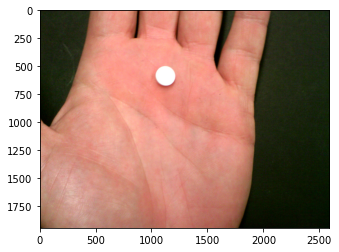

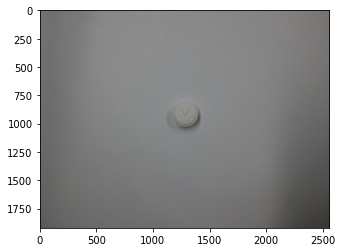

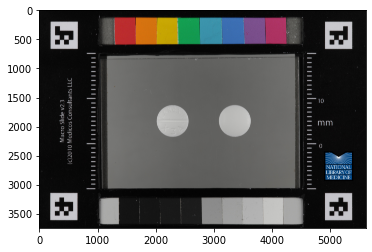

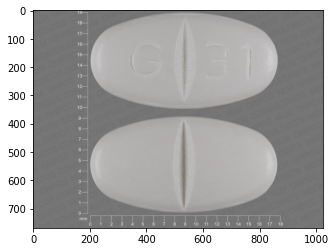

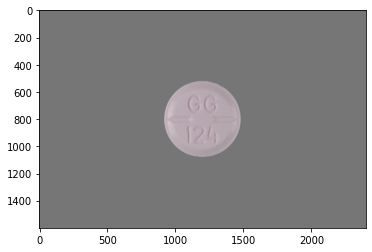

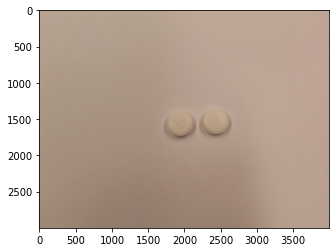

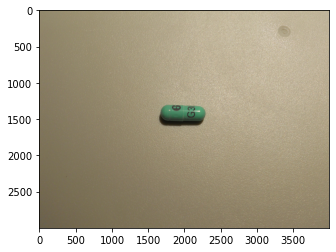

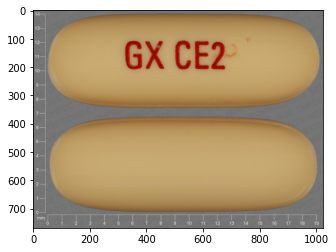

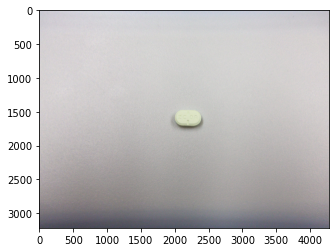

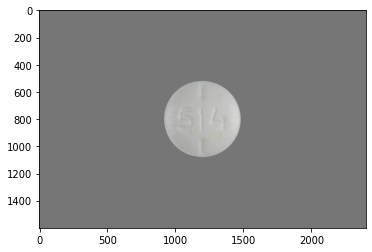

In [19]:
%cd $folder

images = os.listdir()
def process(filename):
    image = mpimg.imread(filename)
    plt.figure()
    plt.imshow(image)

for file in images:
    process(file)

In [22]:
drugsftp = df.FILE.tolist()
drugsftp.sort()
drugsftp[:10]

['PillProjectDisc1/images/!!SRPQXAASBCQPWTY-1_4ONT78S2KK.JPG',
 'PillProjectDisc1/images/!99Q2YI6N7XBRNIV521EXYA051ES_E.JPG',
 'PillProjectDisc1/images/!G2OJPKYTI7ES1-OW251RY6PK6BHU-.JPG',
 'PillProjectDisc1/images/!L72!LZSGQBPUUDO56-XU6KVC45OKW.JPG',
 'PillProjectDisc1/images/!UGIF6I_H_5XC6_A916LVOYLST0SAO.CR2',
 'PillProjectDisc10/images/7135DCC7VXGE3I8F9_QOZ0JWYHZUT4.JPG',
 'PillProjectDisc10/images/7CBG_85RQOODGTH030MF3UI_3PS21B.PNG',
 'PillProjectDisc10/images/7EO-XG_FK7T16N7ADOU0CWL1MJT3CX.JPG',
 'PillProjectDisc100/images/QV3PUW3N2HL6KF8HSXV_1KL7HH98!E.JPG',
 'PillProjectDisc100/images/QY_4JH6D4YSSXZZHN2L!7LGE08P4QZ.PNG']

In [23]:
ftpdir = {}
for i in range(0,len(drugsftp)):
    ftpcall = drugsftp[i].split('/')
    ftppath = ftpcall[0]+'/'+ftpcall[1]+ '/'
    ftpfile = ftpcall[-1]
    ftpdir.setdefault(ftppath,[])
    ftpdir[ftppath].append(ftpfile)
len(ftpdir)

110

In [ ]:
%cd /content/drive/My Drive/Project: Pill ID/Data
for key in ftpdir.keys():
    #%cd /content/drive/My Drive/Project: Pill ID/Data
    ftp = FTP('lhcftp.nlm.nih.gov')
    ftp.login()
    ftp.cwd('Open-Access-Datasets/Pills//')
    ftp.cwd(key)
    dloaded = os.listdir('/content/drive/My Drive/Project: Pill ID/Data')
    print(key)
    for value in ftpdir[key]:
      if value not in dloaded:
        with open(value, 'wb') as fp:
            ftp.retrbinary('RETR '+ value, fp.write)
    ftp.cwd('..')
    ftp.cwd('..')